In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive (1).zip','r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras.utils as image
%matplotlib inline
import seaborn as sns
import cv2
import glob
import random
from os import listdir
import tensorflow.compat.v2 as tf
tf.keras.preprocessing.image.load_img
from tensorflow.keras.preprocessing import image

from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD



In [ ]:
breast_img = glob.glob('/content/drive/MyDrive/IDC_regular_ps50_idx5/**/*.png',recursive=True)

In [ ]:
N_IDC = []
P_IDC = []
for img in breast_img:
  if img[-5] == '0':
    N_IDC.append(img)
  elif img[-5] == '1':
    P_IDC.append(img)

In [ ]:
from keras.preprocessing import image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(N_IDC), 18)
some_can = np.random.randint(0, len(P_IDC), 18)

<Figure size 1500x1500 with 0 Axes>

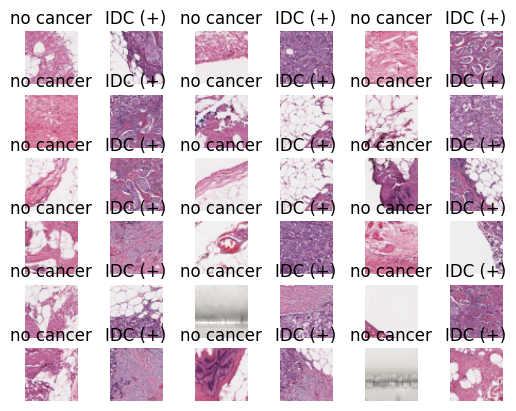

In [17]:
s = 0
for num in some_non:

        img = image.load_img((N_IDC[num]), target_size=(100, 100))
        #img = image.load_img((N_IDC[num]), target_size=(150,150))
        img = image.img_to_array(img)

        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1
for num in some_can:

        img = image.load_img((P_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)

        plt.subplot(6, 6, 2*s)
        plt.axis('off')
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

In [19]:
non_img_arr = []
can_img_arr = []

for img in N_IDC:

    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])

for img in P_IDC:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50,50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size,1])

In [20]:
can_img_arr2=can_img_arr[0:50000]
non_img_arr2=non_img_arr[0:50000]

In [21]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr2, can_img_arr2))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

Total number of images: 1084
Number of IDC(-) Images: 1058
Number of IDC(+) Images: 26
Image shape (Width, Height, Channels): (50, 50, 3)


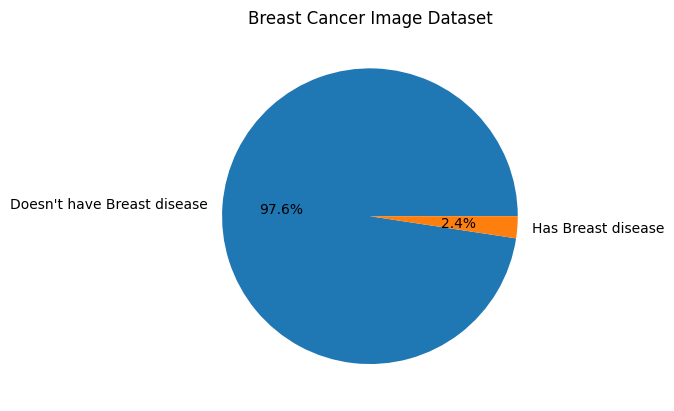

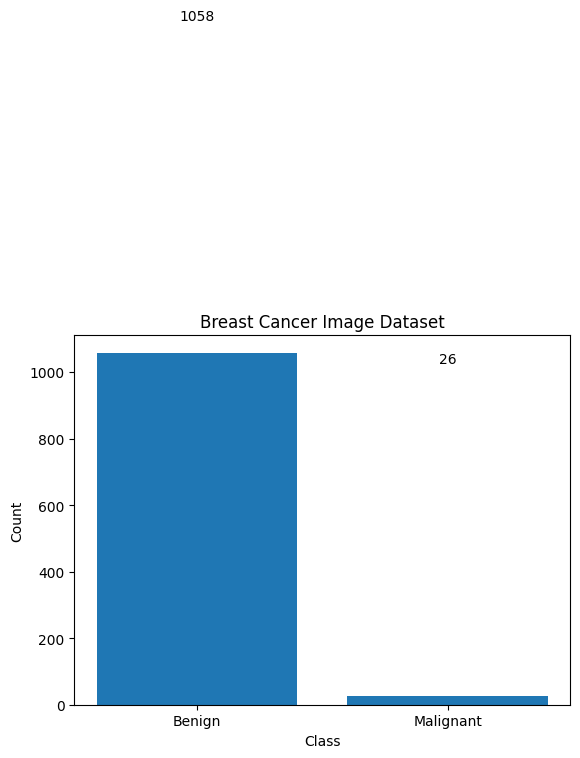

In [22]:
import os
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,y)

benign_count = np.sum(y==0)
malignant_count =  np.sum(y==1)

counts = [benign_count, malignant_count]
labels = ['Doesn\'t have Breast disease', 'Has Breast disease']

plt.pie(counts, labels=labels, autopct='%1.1f%%')
# plt.xlabel('Class')
# plt.ylabel('Count')
plt.title('Breast Cancer Image Dataset')
plt.show()

counts = [benign_count, malignant_count]
labels = ['Benign', 'Malignant']

plt.bar(labels, counts)
plt.title('Breast Cancer Image Dataset')
plt.xlabel('Class')
plt.ylabel('Count')

for i, v in enumerate(counts):
    plt.text(i, v+1000, str(v), ha='center')

plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (758, 50, 50, 3)
Testing Data Shape: (326, 50, 50, 3)


In [24]:
X_train = X_train[0:50000]
Y_train = Y_train[0:50000]
X_test = X_test[0:30000]
Y_test = Y_test[0:30000]

In [25]:
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools

In [26]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

In [27]:
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10, batch_size = 35)

Epoch 1/10
22/22 [==============================] - 35s 1s/step - loss: 0.6793 - accuracy: 0.7111 - val_loss: 0.2386 - val_accuracy: 0.9724
Epoch 2/10
22/22 [==============================] - 19s 854ms/step - loss: 0.4802 - accuracy: 0.8456 - val_loss: 0.1996 - val_accuracy: 0.9724
Epoch 3/10
22/22 [==============================] - 18s 811ms/step - loss: 0.3248 - accuracy: 0.9406 - val_loss: 0.1794 - val_accuracy: 0.9724
Epoch 4/10
22/22 [==============================] - 18s 809ms/step - loss: 0.2603 - accuracy: 0.9604 - val_loss: 0.1542 - val_accuracy: 0.9724
Epoch 5/10
22/22 [==============================] - 20s 935ms/step - loss: 0.2131 - accuracy: 0.9604 - val_loss: 0.1225 - val_accuracy: 0.9724
Epoch 6/10
22/22 [==============================] - 19s 868ms/step - loss: 0.1803 - accuracy: 0.9710 - val_loss: 0.1051 - val_accuracy: 0.9724
Epoch 7/10
22/22 [==============================] - 19s 871ms/step - loss: 0.1606 - accuracy: 0.9763 - val_loss: 0.0955 - val_accuracy: 0.9724
Ep

In [29]:
model.save("breastcancer.h5")

In [30]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [31]:
model= load_model("breastcancer.h5")

In [35]:
import tensorflow.compat.v2 as tf
tf.keras.preprocessing.image.load_img
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/IDC_regular_ps50_idx5/9381/0/9381_idx5_x1001_y1401_class0.png",target_size = (50,50))


In [36]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = model.predict(x)

1/1 [==============================] - 0s 416ms/step


In [37]:
np.round(pred[0][1],0)

0.0